In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline


In [15]:
def load_data_from_file(filename='advertising.csv'):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_y = data[:, 3]
    # ****** your code here ******************
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    return features_X, sales_y


In [16]:
## Question 2
features_X, _= load_data_from_file()
print(features_X[:5, :])


[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [17]:
## Question 3
_, sales_y = load_data_from_file()
print(sales_y.shape)


(200,)


In [81]:
def create_individual(n=4, bound = 10):
    individual = []
    # *************** Your code here *******
    for _ in range(n):
        individual.append(random.uniform(-bound/2, bound/2))
    return individual

individual = create_individual()
print(individual)


[3.6091190518598726, -0.8150138554434285, 0.8648123163814603, 4.8469113743565035]


In [55]:
features_X, sales_y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_y), (y_hat - sales_y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    #********* Your code here **********
    fitness_value = 1 / (loss + 1)
    return fitness_value


In [56]:
## Question 4
individual = [4.09, 4.82, 3.10, 4.02]
print(compute_fitness(individual))


1.0185991537088997e-06


In [57]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    #********* Your code here **********
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new


In [58]:
# Question 5
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]

individual1_new, individual2_new = crossover(individual1, individual2, 2.0)
print("individual1: " , individual1_new)
print("individual2: " , individual2_new)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [59]:
def mutate(individual, mutation_rate=0.05):
    individual_new = individual.copy()
    #********* Your code here **********
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_new[i] = random.uniform(-1, 1)
    return individual_new


In [62]:
# Question 6
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate(before_individual, mutation_rate=2)
print(before_individual == after_individual)


False


In [64]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population



In [84]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [85]:
def create_new_population(old_population, elitism =2, gen=1):
    m = len(old_population)
    sorted_old_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_old_population[m - 1]), "with chromsome: ", sorted_old_population[m -1])

    new_population = []
    while len(new_population) < m-elitism:
        #selection
        #********* Your code here **********
        individual_1 = selection(sorted_old_population, m)
        individual_2 = selection(sorted_old_population, m)

        #crossover
        #********* Your code here **********
        individual_1, individual_2 = crossover(individual_1, individual_2)

        #mutate
        #********* Your code here **********
        individual_1 = mutate(individual_1)
        new_population.append(individual_1)

        #elitism
        #********* Your code here **********
    new_population.extend(sorted_old_population[m-elitism:])
    return new_population, compute_loss(new_population[m-1])


In [86]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population , _ = create_new_population(old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [91]:
def run_ga():
    n_generations = 100
    m = 600
    features_X, sales_y = load_data_from_file()
    population = initialize_population(m)
    loss_history = []
    for i in range(n_generations):
        #********* Your code here **********
        population, loss = create_new_population(population)
        loss_history.append(loss)
    return loss_history, population


Best loss: 423.87409723146715 with chromsome:  [1.077284450379027, -0.01931775993607765, -0.3178136645092451, 0.946192234375606]
Best loss: 411.8486753827746 with chromsome:  [-0.48868545597372215, -0.01931775993607765, -0.3178136645092451, 0.946192234375606]
Best loss: 63.81133381961006 with chromsome:  [-1.2414839347964692, 0.07437500239217343, -0.2626556801039275, 0.3436561688046851]
Best loss: 63.81133381961006 with chromsome:  [-1.2414839347964692, 0.07437500239217343, -0.2626556801039275, 0.3436561688046851]
Best loss: 63.81133381961006 with chromsome:  [-1.2414839347964692, 0.07437500239217343, -0.2626556801039275, 0.3436561688046851]
Best loss: 62.94803415430246 with chromsome:  [0.2851046080529305, 0.07437500239217343, -0.2626556801039275, 0.3436561688046851]
Best loss: 33.43695586533376 with chromsome:  [-0.08431444423663415, 0.07437500239217343, 0.4524800371605433, -0.17025801578902056]
Best loss: 33.43695586533376 with chromsome:  [-0.08431444423663415, 0.07437500239217343,

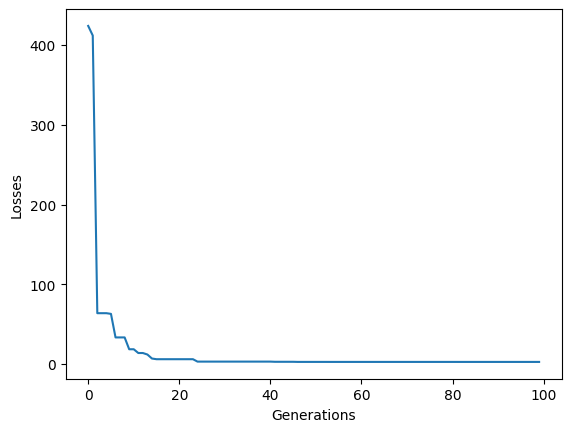

In [92]:
def visualize_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Generations')
    plt.ylabel('Losses')
    plt.show()

loss_history, population = run_ga()
visualize_loss(loss_history)


[4.919241629306374, 0.05274673651611406, 0.10581378539162123, -0.00014543348499640452]


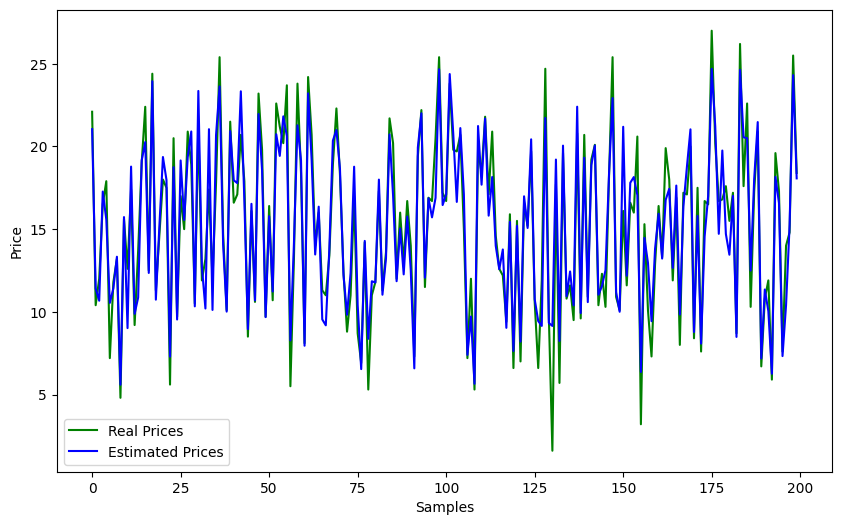

In [93]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in features_X:
        # ************* your code here *************
        estimated_prices.append(feature.dot(theta))
    fig , ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()